In [187]:
import random, concurrent.futures,math, multiprocessing as mp

In [188]:
from IPython import display

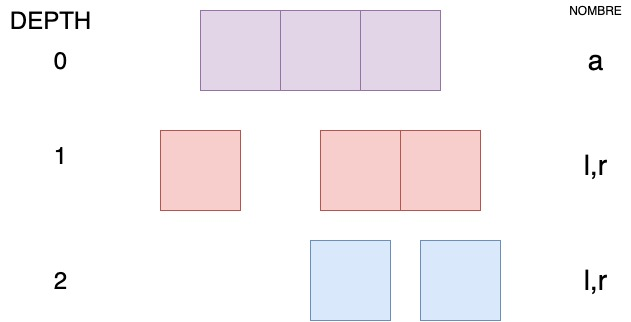

In [189]:
display.Image("OneDrive - Universidad Europea/PCD/Clase del 10 de mayo 2021/MergeSort Paralelo/mergeSortStrategy.jpg")

## DIVIDE

In [ ]:
def ms(a):
    if len(a)<2:
        return a
    else:
        m=len(a)//2
        l=ms(a[:m])
        r=ms(a[m:])
        return mix(l,r)

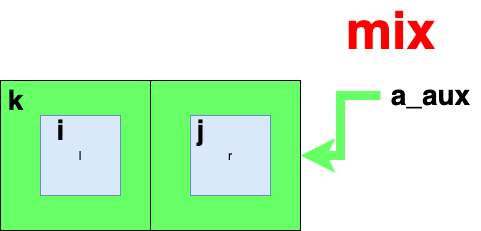

In [190]:
display.Image("OneDrive - Universidad Europea/PCD/Clase del 10 de mayo 2021/MergeSort Paralelo/mix.png")

## MIX (COMBINE)

In [ ]:
def mix(l,r):
    a_aux = [range(len(l)+len(r))]
    i=j=k=0
    while i<len(l) and j<len(r):
        if l[i]<r[j]:
            a_aux[k]=l[i]
            i+=1
        else:
            a_aux[k]=r[j]
            j+=1
        k+=1
    while i<len(l):
        a_aux[k]=l[i]
        i+=1
        k+=1
    while j<len(r):
        a_aux[k]=r[j]
        j+=1
        k+=1
    return a_aux

## COLLECT

In [ ]:
def merge_sync(results_core1, results_core2, results): # Ordena resuls finales > all cores
    results.append(mix(results_core1, results_core2))

In [ ]:
def merge_sort_sync(divided_array, results):# Une resuls del COMBINE en c/core in Sh-Mem""

    results.append(merge_sort(divided_array))

## MS PARALELO

In [ ]:
def parallel_ms(a):
    n_cores = mp.cpu_count()
    size = math.ceil(len(a) / n_cores
    manager = mp.Manager()
    results = manager.list()
    cores = []
    for core in range(n_cores):  # Asigno a cada core el trabajo que le toca
        start = core * size  # Calculo i para marcar inicio del trabajo del core en relacion a las filas
        end = (core + 1) * size  # Calculo f para marcar fin del trabajo del core, ver excel
        cores.append(mp.Process(target=merge_sort_sync,
                                args=(a[start:end], results)))  # Añado al Array los cores y su trabajo
    for core in cores:
        core.start()  # Arranco y ejecuto el trabajo para c/ uno de los cores que tenga mi equipo, ver excel
    for core in cores:
        core.join()  # Bloqueo cualquier llamada hasta que terminen su trabajo todos los cores

    with concurrent.futures.ProcessPoolExecutor() as capataz: Asigno los resultados de c/core to Sort. 
        while len(results) > 1: 
            capataz.submit(merge_sync(results.pop(0), results.pop(0), results))

    return results[0]